In [1]:
import numpy as np
import pandas as pd

In [2]:
from Function_readLabChartMat import get_pages_data, backRMS, autoEventDetection, manualEventDetect, avgVals

In [3]:
filename = "/Users/tarunarora/Documents/H-reflex/temp pract data/CT_10012024Prac03/mat files_prac03/prac03_HReflexStanding_15trials.mat"
preTrigger = 50 #time in msec
postTrigger = 100 #time in msec
samp_rate = 2000
pre_time_ms = 50 
post_time_ms = 100
avgFact = 15

In [5]:
# calling function to obtain the pages
pages = get_pages_data(filename, samp_rate, pre_time_ms, post_time_ms, avgFact = 15)

In [6]:
# calling a specific page
indEpoch = pages[9][1]

Text(0, 0.5, 'Amplitude (mV)')

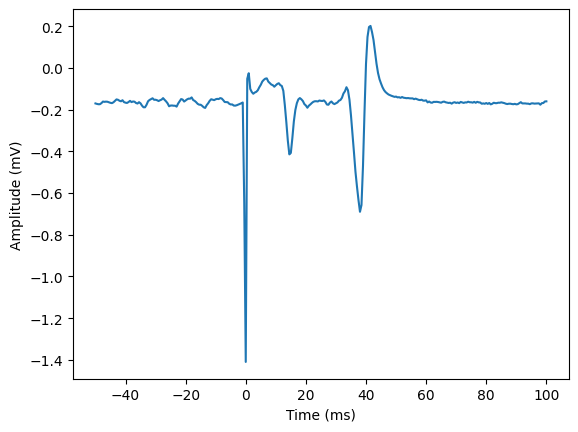

In [7]:
#plotting individual epoch

import matplotlib.pyplot as plt
timeAxis = np.linspace(-pre_time_ms,post_time_ms, len(indEpoch))
plt.plot(timeAxis, indEpoch*1000)
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude (mV)")



0.8913749958689247
0.3644166664040919


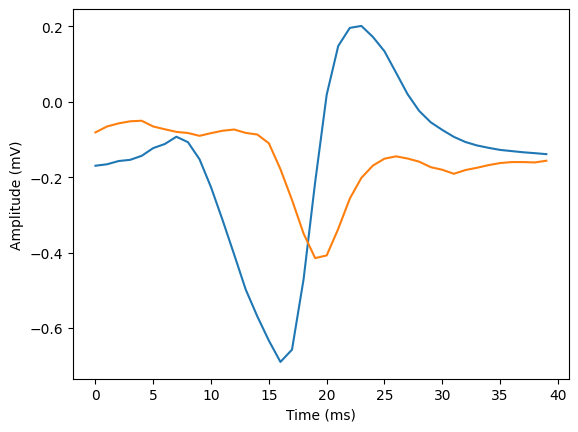

In [8]:
hOnset_ms = 30
mOnset_ms = 5
rangeTime_ms = 20
hmSignals = manualEventDetect(indEpoch, pre_time_ms, samp_rate, hOnset_ms, mOnset_ms, rangeTime_ms)

plt.plot(hmSignals[0]*1000)
plt.plot(hmSignals[1]*1000)

plt.xlabel("Time (ms)")
plt.ylabel("Amplitude (mV)")

Hamp_mV = (max(hmSignals[0])-min(hmSignals[0]))*1000

Mamp_mV = (max(hmSignals[1])-min(hmSignals[1]))*1000

print(Hamp_mV)
print(Mamp_mV)

In [10]:
ch = 2
HAmplitudes = []
MAmplitudes = []
for no_epoch in range(len(pages)):
    ind_EMGepoch = pages[no_epoch][ch-1]
    hmSignals = manualEventDetect(ind_EMGepoch, pre_time_ms, samp_rate, 35, 5, 20)
    Hamp_mV = (max(hmSignals[0])-min(hmSignals[0]))*1000
    HAmplitudes.append(Hamp_mV)
    Mamp_mV = (max(hmSignals[1])-min(hmSignals[1]))*1000
    MAmplitudes.append(Mamp_mV)

print(HAmplitudes)
print(MAmplitudes)
    

[0.0019499999856028196, 0.0024416667002924437, 0.0020124999309700793, 0.001950000031077555, 0.0020124999726552537, 0.0011583333616727032, 0.001358333361167751, 0.0013874999860756052, 0.0015499999212427915, 0.001670833345694215, 0.0013458333266195646, 0.002079166682733558]
[0.0016666666529848344, 0.0017500000216349085, 0.0009958333369771326, 0.0009874999401896884, 0.0015833333350201424, 0.0015041665771301873, 0.0011666666978271682, 0.0009875000159809129, 0.0012374999717697697, 0.0010833333059660313, 0.001424999997349612, 0.0015708332891032721]


In [21]:
ch = 2
pages4rms = get_pages_data(filename, samp_rate, pre_time_ms, post_time_ms, avgFact = 0)
backrms_startms = 50
backrms_endms = 1
ch = 1
allrmsVals = []
for no_RMSepoch in range(len(pages4rms)):
    ind_RMSepoch = pages4rms[no_RMSepoch][ch-1]
    backRMSval = backRMS(indEpoch, backrms_startms, backrms_endms, samp_rate, pre_time_ms)
    allrmsVals.append(backRMSval)

# using function avgVals to calculate average of certain pages
avgRMSvals_ms = avgVals(allrmsVals, 15)*1000




[-0.0001643813776363644, -0.0001643813776363644, -0.0001643813776363644, -0.0001643813776363644, -0.0001643813776363644, -0.0001643813776363644, -0.0001643813776363644, -0.0001643813776363644, -0.0001643813776363644, -0.0001643813776363644, -0.0001643813776363644, -0.0001643813776363644, -0.0001643813776363644, -0.0001643813776363644, -0.0001643813776363644, -0.0001643813776363644, -0.0001643813776363644, -0.0001643813776363644, -0.0001643813776363644, -0.0001643813776363644, -0.0001643813776363644, -0.0001643813776363644, -0.0001643813776363644, -0.0001643813776363644, -0.0001643813776363644, -0.0001643813776363644, -0.0001643813776363644, -0.0001643813776363644, -0.0001643813776363644, -0.0001643813776363644, -0.0001643813776363644, -0.0001643813776363644, -0.0001643813776363644, -0.0001643813776363644, -0.0001643813776363644, -0.0001643813776363644, -0.0001643813776363644, -0.0001643813776363644, -0.0001643813776363644, -0.0001643813776363644, -0.0001643813776363644, -0.000164381377

In [ ]:
# Plotting back RMS
backRMS_timeAxis = np.linspace(backrms_startms,backrms_endms, len(backRMSval))
plt.plot(backRMS_timeAxis,backRMSval)
plt.gca().invert_xaxis()


In [ ]:
# signal processing of back rms and calculation of RMS value
RMS_signal_noDCOffset = backRMSval - np.mean(backRMSval)
plt.plot(backRMS_timeAxis,RMS_signal_noDCOffset)
plt.gca().invert_xaxis()

rmsVal_V = np.sqrt(np.mean(RMS_signal_noDCOffset ** 2)) 
rmsInmV = rmsVal_V * 1000
print(rmsInmV)

In [ ]:
backgroundEMG = backRMSval
onTime_ms = 5 
offTime_ms = 10 
std = 3 
sampRate = samp_rate
a = autoEventDetection(indEpoch, backgroundEMG, onTime_ms, offTime_ms, std, sampRate)


In [ ]:
plt.plot(indEpoch)
for onval in a[0]:
    plt.axvline(x=onval, color='r', linestyle='--', label=f'Onset at {onval}')
for offval in a[1]:
    plt.axvline(x=offval, color='g', linestyle='--', label=f'Onset at {offval}')

In [ ]:
expected_event_ms = [1, 10, 40] #expected values of elect stim, m wave and h wave
expected_event_points = (np.array(expected_event_ms) + pre_time_ms) * samp_rate / 1000
print(expected_event_points)

eventES = min(a[0], key=lambda x: abs(x - expected_event_points[0]))
print(eventES)


In [ ]:
hOnset_ms = 30
mOnset_ms = 5
rangeTime_ms = 20 # a rough estimate of how many ms after the onset the signal will last without any other event

hRange_ms = np.array([hOnset_ms, hOnset_ms+rangeTime_ms]) + pre_time_ms
mRange_ms = np.array([mOnset_ms, mOnset_ms+rangeTime_ms]) + pre_time_ms

hRange_points = (hRange_ms*samp_rate//1000)
mRange_points = (mRange_ms*samp_rate//1000)



In [ ]:
hSignal = np.array(indEpoch[hRange_points[0]:hRange_points[1]])
plt.plot(hSignal)

mSignal = np.array(indEpoch[mRange_points[0]:mRange_points[1]])
plt.plot(mSignal)

In [ ]:
Hamp_mV = (max(hSignal)-min(hSignal))*1000
print(Hamp_mV)

Mamp_mV = (max(mSignal)-min(mSignal))*1000
print(Mamp_mV)

In [ ]:
def HMEpochs(indEpoch, hOnset_ms = None, mOnset_ms = None, rangeTime_ms = None):
    if hOnset_ms == None or mOnset_ms == None or rangeTime_ms == None:
        print("******* H and M onset times and range not defined, trying automatic detection *****")
        a = autoEventDetection(indEpoch, backgroundEMG, samp_rate, onTime_ms = 5, offTime_ms = 5, std = 3)
    else:
        


In [ ]:
a[0]

In [ ]:
expectedMOnset_ms = 5
expectedHOnset_ms = 35

expected_vals = (np.array([expectedMOnset_ms, expectedHOnset_ms]) + pre_time_ms)* samp_rate/1000
print(expected_vals)

detected_Mval = min(a[0], key=lambda x: abs(x - expected_vals[0]))
detected_Hval = min(a[0], key=lambda x: abs(x - expected_vals[1]))

print(detected_Mval)
print(detected_Hval)


In [ ]:
allPages = get_pages_data(filename, samp_rate, pre_time_ms, post_time_ms)

In [ ]:
avgIndEpoch = get_pages_data(filename, samp_rate, pre_time_ms, post_time_ms, len(allPages))
print(len(avgIndEpoch[0]))
avgIndEpoch = avgIndEpoch[0][1]
print(len(avgIndEpoch))

In [ ]:
backgroundEMG = backRMSval
onTime_ms = 10 
offTime_ms = 10 
std = 1 
sampRate = samp_rate
b = autoEventDetection(avgIndEpoch, backgroundEMG, samp_rate, pre_time_ms = 50, onTime_ms = 5, offTime_ms = 5, std = 3)
print(b)

In [ ]:
plt.plot(avgIndEpoch)
for onval in b[0]:
    plt.axvline(x=onval, color='r', linestyle='--', label=f'Onset at {onval}')
for offval in b[1]:
    plt.axvline(x=offval, color='g', linestyle='--', label=f'Onset at {offval}')

In [ ]:
len(pages)

In [ ]:
avgIndEpoch = get_pages_data(filename, samp_rate, pre_time_ms, post_time_ms, len(allPages))

In [ ]:
len(allPages)